In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

# Data

In [2]:
# data_path = "/kaggle/input/traffic/data.csv"
data_path = "data.csv"

df = pd.read_csv(data_path)


In [3]:
df = df[df['Dst Port'] != 'Dst Port']

df['Dst Port'] = df['Dst Port'].astype(int)
df['Protocol'] = df['Protocol'].astype(int)
df['Flow Duration'] = df['Flow Duration'].astype(int)
df['Tot Fwd Pkts'] = df['Tot Fwd Pkts'].astype(int)
df['Tot Bwd Pkts'] = df['Tot Bwd Pkts'].astype(int)
df['TotLen Fwd Pkts'] = df['TotLen Fwd Pkts'].astype(int)
df['TotLen Bwd Pkts'] = df['TotLen Bwd Pkts'].astype(int)
df['Fwd Pkt Len Max'] = df['Fwd Pkt Len Max'].astype(int)
df['Fwd Pkt Len Min'] = df['Fwd Pkt Len Min'].astype(int)
df['Fwd Pkt Len Mean'] = df['Fwd Pkt Len Mean'].astype(float)
df['Fwd Pkt Len Std'] = df['Fwd Pkt Len Std'].astype(float)
df['Bwd Pkt Len Max'] = df['Bwd Pkt Len Max'].astype(int)
df['Bwd Pkt Len Min'] = df['Bwd Pkt Len Min'].astype(int)
df['Bwd Pkt Len Mean'] = df['Bwd Pkt Len Mean'].astype(float)
df['Bwd Pkt Len Std'] = df['Bwd Pkt Len Std'].astype(float)
df['Flow Byts/s'] = df['Flow Byts/s'].astype(float)
df['Flow Pkts/s'] = df['Flow Pkts/s'].astype(float)
df['Flow IAT Mean'] = df['Flow IAT Mean'].astype(float)
df['Flow IAT Std'] = df['Flow IAT Std'].astype(float)
df['Flow IAT Max'] = df['Flow IAT Max'].astype(int)
df['Flow IAT Min'] = df['Flow IAT Min'].astype(int)
df['Fwd IAT Tot'] = df['Fwd IAT Tot'].astype(int)
df['Fwd IAT Mean'] = df['Fwd IAT Mean'].astype(float)
df['Fwd IAT Std'] = df['Fwd IAT Std'].astype(float)
df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(int)
df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(int)
df['Bwd IAT Tot'] = df['Bwd IAT Tot'].astype(int)
df['Bwd IAT Mean'] = df['Bwd IAT Mean'].astype(float)
df['Bwd IAT Std'] = df['Bwd IAT Std'].astype(float)
df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(int)
df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(int)
df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype(int)
df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype(int)
df['Fwd URG Flags'] = df['Fwd URG Flags'].astype(int)
df['Bwd URG Flags'] = df['Bwd URG Flags'].astype(int)
df['Fwd Header Len'] = df['Fwd Header Len'].astype(int)
df['Bwd Header Len'] = df['Bwd Header Len'].astype(int)
df['Fwd Pkts/s'] = df['Fwd Pkts/s'].astype(float)
df['Bwd Pkts/s'] = df['Bwd Pkts/s'].astype(float)
df['Pkt Len Min'] = df['Pkt Len Min'].astype(int)
df['Pkt Len Max'] = df['Pkt Len Max'].astype(int)
df['Pkt Len Mean'] = df['Pkt Len Mean'].astype(float)
df['Pkt Len Std'] = df['Pkt Len Std'].astype(float)
df['Pkt Len Var'] = df['Pkt Len Var'].astype(float)
df['FIN Flag Cnt'] = df['FIN Flag Cnt'].astype(int)
df['SYN Flag Cnt'] = df['SYN Flag Cnt'].astype(int)
df['RST Flag Cnt'] = df['RST Flag Cnt'].astype(int)
df['PSH Flag Cnt'] = df['PSH Flag Cnt'].astype(int)
df['ACK Flag Cnt'] = df['ACK Flag Cnt'].astype(int)
df['URG Flag Cnt'] = df['URG Flag Cnt'].astype(int)
df['CWE Flag Count'] = df['CWE Flag Count'].astype(int)
df['ECE Flag Cnt'] = df['ECE Flag Cnt'].astype(int)
df['Down/Up Ratio'] = df['Down/Up Ratio'].astype(int)
df['Pkt Size Avg'] = df['Pkt Size Avg'].astype(float)
df['Fwd Seg Size Avg'] = df['Fwd Seg Size Avg'].astype(float)
df['Bwd Seg Size Avg'] = df['Bwd Seg Size Avg'].astype(float)
df['Fwd Byts/b Avg'] = df['Fwd Byts/b Avg'].astype(int)
df['Fwd Pkts/b Avg'] = df['Fwd Pkts/b Avg'].astype(int)
df['Fwd Blk Rate Avg'] = df['Fwd Blk Rate Avg'].astype(int)
df['Bwd Byts/b Avg'] = df['Bwd Byts/b Avg'].astype(int)
df['Bwd Pkts/b Avg'] = df['Bwd Pkts/b Avg'].astype(int)
df['Bwd Blk Rate Avg'] = df['Bwd Blk Rate Avg'].astype(int)
df['Subflow Fwd Pkts'] = df['Subflow Fwd Pkts'].astype(int)
df['Subflow Fwd Byts'] = df['Subflow Fwd Byts'].astype(int)
df['Subflow Bwd Pkts'] = df['Subflow Bwd Pkts'].astype(int)
df['Subflow Bwd Byts'] = df['Subflow Bwd Byts'].astype(int)
df['Init Fwd Win Byts'] = df['Init Fwd Win Byts'].astype(int)
df['Init Bwd Win Byts'] = df['Init Bwd Win Byts'].astype(int)
df['Fwd Act Data Pkts'] = df['Fwd Act Data Pkts'].astype(int)
df['Fwd Seg Size Min'] = df['Fwd Seg Size Min'].astype(int)
df['Active Mean'] = df['Active Mean'].astype(float)
df['Active Std'] = df['Active Std'].astype(float)
df['Active Max'] = df['Active Max'].astype(int)
df['Active Min'] = df['Active Min'].astype(int)
df['Idle Mean'] = df['Idle Mean'].astype(float)
df['Idle Std'] = df['Idle Std'].astype(float)
df['Idle Max'] = df['Idle Max'].astype(int)
df['Idle Min'] = df['Idle Min'].astype(int)

In [4]:
df.drop(["Timestamp"], axis=1, inplace=True)
df.drop(["Dst Port"], axis=1, inplace=True)

df["Flow Byts/s"] = df["Flow Byts/s"].replace(np.inf, np.nan)
df["Flow Pkts/s"] = df["Flow Pkts/s"].replace(np.inf, np.nan)

df["Flow Pkts/s"] = df["Flow Pkts/s"].replace(np.nan, df["Flow Pkts/s"].max())

In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)


## Label encode

In [6]:
df['Label'].values
# how many rows with Label == 'DoS attacks-SynFlood'
print(df[df['Label'] == 'DoS attacks-SynFlood'].shape[0])

135


In [8]:
vec_len = len(df['Label'].unique())
vec_len

15

In [9]:
ohe = OneHotEncoder(sparse_output=False)
labels_onehot = ohe.fit_transform(df['Label'].values.reshape(-1, 1))

onehot_df = pd.DataFrame(labels_onehot, columns=ohe.categories_[0], index=df.index)

df = pd.concat([df.drop(columns=['Label']), onehot_df], axis=1)

In [10]:
df.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,DDOS attack-LOIC-UDP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,DoS attacks-Slowloris,DoS attacks-SynFlood,FTP-BruteForce,Infilteration,SQL Injection,SSH-Bruteforce
0,6,165,2,0,0,0,0,0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,5727100,4,4,97,231,97,0,24.25,48.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,4053796,14,8,1456,1731,741,0,104.00,195.013609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,833502,7,5,364,582,103,0,52.00,49.217206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,601,1,1,53,85,53,53,53.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(labels_onehot)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


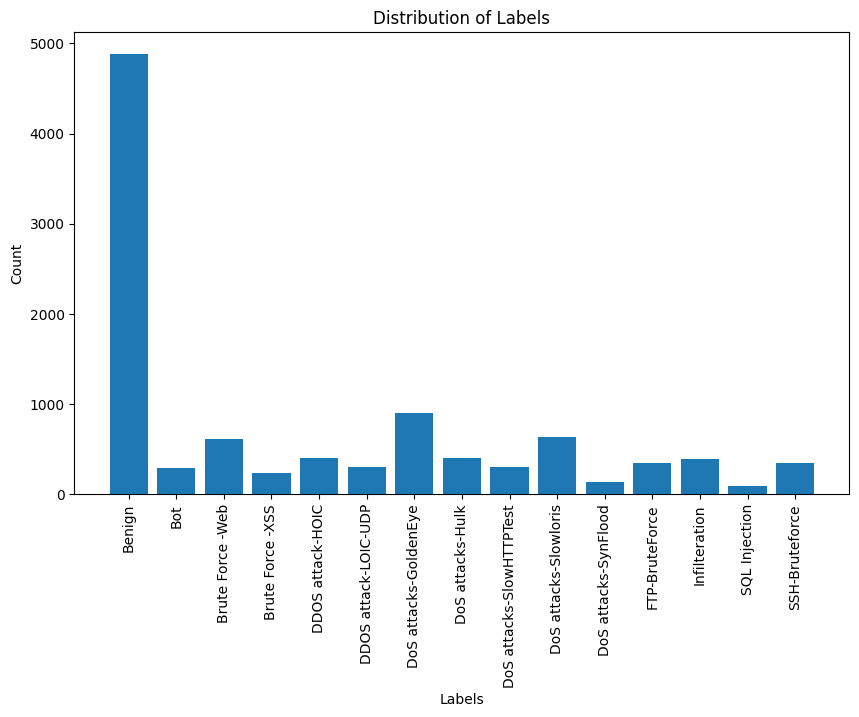

In [12]:
# Sum the one-hot encoded labels along the rows to get the count of each label
label_counts = labels_onehot.sum(axis=0)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(ohe.categories_[0], label_counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=90)
plt.show()

## Drop low corr with Label

In [13]:
corr_matrix = df.corr(numeric_only=True)
corr_pairs = corr_matrix.unstack()
threshold = 0.9
strong_corr = corr_pairs[
    (abs(corr_pairs) > threshold)
    & (corr_pairs != 1)
    & (corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1))
]
strong_corr = strong_corr.sort_values(ascending=False)
pd.set_option("display.max_rows", None)

print(strong_corr)

Subflow Fwd Pkts      Fwd Act Data Pkts       1.000000
Fwd Act Data Pkts     Subflow Fwd Pkts        1.000000
Tot Fwd Pkts          Fwd Act Data Pkts       1.000000
Fwd Act Data Pkts     Tot Fwd Pkts            1.000000
Tot Fwd Pkts          Fwd Header Len          0.999998
Fwd Header Len        Tot Fwd Pkts            0.999998
Subflow Fwd Pkts      Fwd Header Len          0.999998
Fwd Header Len        Subflow Fwd Pkts        0.999998
Fwd Act Data Pkts     Fwd Header Len          0.999996
Fwd Header Len        Fwd Act Data Pkts       0.999996
                      Subflow Fwd Byts        0.999948
                      TotLen Fwd Pkts         0.999948
TotLen Fwd Pkts       Fwd Header Len          0.999948
Subflow Fwd Byts      Fwd Header Len          0.999948
TotLen Fwd Pkts       Tot Fwd Pkts            0.999929
Tot Fwd Pkts          TotLen Fwd Pkts         0.999929
Subflow Fwd Pkts      Subflow Fwd Byts        0.999929
Subflow Fwd Byts      Tot Fwd Pkts            0.999929
Subflow Fw

In [14]:
cols_to_drop = set()

for col1, col2 in strong_corr.index:
    if col1 not in cols_to_drop:
        cols_to_drop.add(col2)

cols_to_drop.remove('DDOS attack-LOIC-UDP')


In [15]:
df_final = df.drop(columns=cols_to_drop, axis=1)

In [16]:
df_final.to_csv("model/train_data.csv", index=False)
df_final.shape

(10256, 66)

## Train test split

In [18]:
X = df_final.iloc[:, :-15]
y = df_final.iloc[:, -15:]

print(X.columns)
print(y.columns)
print(X.shape)
print(y.shape)

Index(['Protocol', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Fwd IAT Tot', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Std', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Active Std', 'Active Max',
       'Active Min', 'Idle Std', 'Idle Min'],
      dtype='object')
Index(['Benign', 'Bot

In [19]:
# perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()  # Convert to numpy
y_test = y_test.to_numpy()    # Convert to numpy

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print(X_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([8204, 51])
torch.Size([8204, 15])


# Model

In [31]:
from torch.nn import functional as F 
class Classifier(nn.Module):
    def __init__(self, input_dim, output_dim, mapper, learning_rate):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, output_dim)

        self.mapper = mapper
        self.criterion = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate
        self.output_dim = output_dim

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return self.output(x)

model = Classifier(X_train_tensor.shape[1], y_train_tensor.shape[1], mapper={}, learning_rate=0.001)

In [28]:
model

Classifier(
  (fc1): Linear(in_features=51, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=15, bias=True)
  (criterion): CrossEntropyLoss()
)

In [32]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

In [33]:
epochs = 200
batch_size = 32

train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)


for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    
    for batch_X, batch_y in train_loader:
        # print("batch_y", batch_y)
        optimizer.zero_grad()
        predictions = model(batch_X)
        # print("predictions", predictions.shape)
        loss = loss_fn(predictions, batch_y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
        # print(predictions)
        # print(batch_y)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/200, Loss: 624.1343
Epoch 2/200, Loss: 417.5836
Epoch 3/200, Loss: 323.9073
Epoch 4/200, Loss: 259.4730
Epoch 5/200, Loss: 215.2539
Epoch 6/200, Loss: 183.8241
Epoch 7/200, Loss: 161.1714
Epoch 8/200, Loss: 144.9605
Epoch 9/200, Loss: 133.6222
Epoch 10/200, Loss: 125.9776
Epoch 11/200, Loss: 120.3033
Epoch 12/200, Loss: 116.2897
Epoch 13/200, Loss: 112.4163
Epoch 14/200, Loss: 109.4376
Epoch 15/200, Loss: 107.2571
Epoch 16/200, Loss: 105.1233
Epoch 17/200, Loss: 103.3901
Epoch 18/200, Loss: 101.8059
Epoch 19/200, Loss: 100.4048
Epoch 20/200, Loss: 98.8794
Epoch 21/200, Loss: 97.8889
Epoch 22/200, Loss: 96.9286
Epoch 23/200, Loss: 95.7629
Epoch 24/200, Loss: 94.9171
Epoch 25/200, Loss: 94.0480
Epoch 26/200, Loss: 93.2671
Epoch 27/200, Loss: 92.3664
Epoch 28/200, Loss: 91.8644
Epoch 29/200, Loss: 90.8603
Epoch 30/200, Loss: 90.0278
Epoch 31/200, Loss: 89.7023
Epoch 32/200, Loss: 88.9668
Epoch 33/200, Loss: 88.1562
Epoch 34/200, Loss: 87.3612
Epoch 35/200, Loss: 87.1213
Epoch 36/2

In [34]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    print(test_predictions)
    test_predictions = (test_predictions >= 0.5).float()

    correct_per_sample = test_predictions.eq(y_test_tensor).sum(dim=1) 
    total_labels_per_sample = y_test_tensor.size(1)
    accuracy_per_sample = correct_per_sample / total_labels_per_sample
    accuracy = accuracy_per_sample.mean().item()
    
    print(f"Test Accuracy: {accuracy:.4f}")
    
# print(probabilities)
class_idx = torch.argmax(test_predictions, dim=1)
print(class_idx)

unique_classes, counts = torch.unique(class_idx, return_counts=True)
value_counts = {int(cls): int(count) for cls, count in zip(unique_classes, counts)}
print(value_counts)



tensor([[ 11.6177,  -6.8892, -16.1563,  ...,   9.4880, -10.0162, -12.1330],
        [  9.3483, -20.6178, -30.9198,  ...,   8.6782, -22.8476,  -4.3965],
        [-24.3499, -31.7274, -12.8525,  ..., -20.6478, -29.5648, -66.6610],
        ...,
        [ -1.8177, -42.0580, -11.1744,  ...,  -8.3677, -26.1744, -11.7104],
        [ -3.9421,  -8.0254, -10.8569,  ...,  -7.0727, -15.0934, -11.9113],
        [ -7.0064, -25.5571, -14.9779,  ...,  -6.9012, -20.0571, -29.6058]])
Test Accuracy: 0.9387
tensor([0, 0, 9,  ..., 6, 7, 9])
{0: 1136, 1: 83, 2: 119, 3: 20, 4: 81, 5: 60, 6: 172, 7: 76, 8: 129, 9: 130, 10: 1, 14: 45}


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Giả định `test_predictions` và `y_test_tensor` đã được định nghĩa
test_predictions = (test_predictions >= 0.5).float()

# Precision, Recall và F1 tính cho từng lớp
precision = precision_score(y_test_tensor.numpy(), test_predictions.numpy(), average=None)
recall = recall_score(y_test_tensor.numpy(), test_predictions.numpy(), average=None)
f1 = f1_score(y_test_tensor.numpy(), test_predictions.numpy(), average=None)

# F2 score
beta = 2
f2 = [
    (1 + beta ** 2) * (p * r) / ((beta ** 2 * p) + r)
    for p, r in zip(precision, recall)
]

# In kết quả
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F2 Score:", f2)


Precision: [0.89597001 0.59770115 0.68674699 0.23529412 0.98765432 0.15957447
 0.99447514 0.62809917 0.46511628 0.80152672 0.96428571 0.53488372
 0.07464213 0.11904762 0.97826087]
Recall: [0.97850563 0.9122807  0.93442623 0.43478261 1.         1.
 1.         0.95       1.         0.82677165 1.         0.98571429
 0.92405063 0.58823529 0.64285714]
F1 Score: [0.93542074 0.72222222 0.79166667 0.30534351 0.99378882 0.27522936
 0.99722992 0.75621891 0.63492063 0.81395349 0.98181818 0.69346734
 0.13812677 0.1980198  0.77586207]
F2 Score: [0.9608040201005026, 0.8253968253968254, 0.8715596330275229, 0.3717472118959108, 0.9975062344139651, 0.487012987012987, 0.9988901220865705, 0.8616780045351473, 0.8130081300813009, 0.8215962441314553, 0.9926470588235292, 0.843520782396088, 0.2820710973724884, 0.3289473684210526, 0.6901840490797547]


In [23]:
class_labels = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
       'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP', 'DoS attacks-GoldenEye',
       'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris','DoS attacks-SynFlood',
       'FTP-BruteForce', 'Infilteration', 'SQL Injection', 'SSH-Bruteforce']

# Create mapper
mapper = {index + 1: label.lower() for index, label in enumerate(class_labels)}
print(mapper)


{1: 'benign', 2: 'bot', 3: 'brute force -web', 4: 'brute force -xss', 5: 'ddos attack-hoic', 6: 'ddos attack-loic-udp', 7: 'dos attacks-goldeneye', 8: 'dos attacks-hulk', 9: 'dos attacks-slowhttptest', 10: 'dos attacks-slowloris', 11: 'dos attacks-synflood', 12: 'ftp-bruteforce', 13: 'infilteration', 14: 'sql injection', 15: 'ssh-bruteforce'}


In [24]:
class_name = [mapper[index.item()+1] for index in class_idx]
print(class_name)

['ddos attack-hoic', 'dos attacks-hulk', 'benign', 'benign', 'benign', 'dos attacks-goldeneye', 'ssh-bruteforce', 'benign', 'benign', 'ssh-bruteforce', 'benign', 'benign', 'dos attacks-slowhttptest', 'benign', 'benign', 'benign', 'ddos attack-hoic', 'ddos attack-loic-udp', 'benign', 'ssh-bruteforce', 'benign', 'benign', 'dos attacks-slowloris', 'benign', 'dos attacks-slowhttptest', 'dos attacks-goldeneye', 'dos attacks-goldeneye', 'benign', 'benign', 'benign', 'benign', 'dos attacks-slowhttptest', 'benign', 'dos attacks-goldeneye', 'ddos attack-hoic', 'benign', 'dos attacks-slowloris', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'dos attacks-slowloris', 'ddos attack-hoic', 'benign', 'benign', 'benign', 'benign', 'ddos attack-loic-udp', 'dos attacks-slowhttptest', 'benign', 'dos attacks-slowloris', 'dos attacks-slowloris', 'brute force -web', 'benign', 'ddos attack-hoic', 'benign', 'benign', 'dos attacks-hulk', 

In [36]:
import os


save_path = os.path.join('./model/model.pth')

torch.save(
                {
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                }
                , save_path)